## plan_pole_transect
Visualize pole locations on Pea Island beach transect.

Profiles were extracted from SfM maps by Jenna on 31 August 2021 - Provisional Data.

#### Read in profiles
Use pandas to read profiles; pull out arrays of  x, y (UTM meters, same for all profiles) and z (m NAVD88).  
Calculate distance along profile from arbitrary starting point.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

fnames = ['crossShore_profile_2019_preDorian.xyz', 'crossShore_profile_2019_postDorian.xyz',
          'crossShore_profile_2020_Sep.xyz',       'crossShore_profile_2021_Apr.xyz']
df0 = pd.read_csv(fnames[0],skiprows=1,sep=',',header=None,names=['x','y','z'])
df1 = pd.read_csv(fnames[1],skiprows=1,sep=',',header=None,names=['x','y','z'])
df2 = pd.read_csv(fnames[2],skiprows=1,sep=',',header=None,names=['x','y','z'])
df3 = pd.read_csv(fnames[3],skiprows=1,sep=',',header=None,names=['x','y','z'])
df0.describe()
x = df0['x'].values
y = df0['y'].values
z0 = df0['z'].values
z1 = df1['z'].values
z2 = df2['z'].values
z3 = df3['z'].values
dist = np.sqrt((x - x[0])**2+(y-y[0])**2)

#### Plot profiles and pole locations
Apply arbitrary vertical offset to profiles to collapse them. The range of these offsets suggests fairly big uncertainty in the elevation data. 
Define a function to plot pole at ground level with 2 m embedded and 3 m above ground.  
Make plot with vertical exaggeration of 2.1 bazillion.


`edist` - Horizontal retreat of hypothetical eroded profile.  
`pole_locations` - Locations of the pole along the transect...fiddle with this.  
`polz` - Function to plot the poles at the specified locations, with 2 m buried below local ground elev. and 3 m proud.

dist, z: 96.0, 1.4   utmx, utmy: 456566.4, 3948280.0
dist, z: 89.0, 1.8   utmx, utmy: 456559.5, 3948278.8
dist, z: 82.0, 2.3   utmx, utmy: 456552.6, 3948277.7
dist, z: 75.0, 3.8   utmx, utmy: 456545.7, 3948276.5
dist, z: 68.0, 4.5   utmx, utmy: 456538.8, 3948275.4
dist, z: 55.0, 4.9   utmx, utmy: 456526.0, 3948273.2
dist, z: 42.0, 2.6   utmx, utmy: 456513.1, 3948271.1


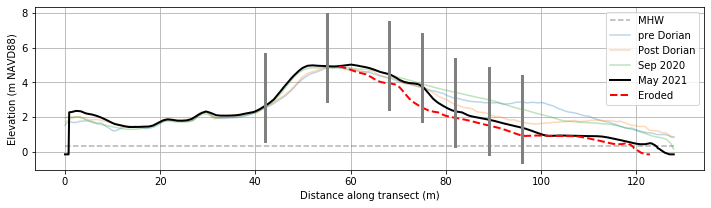

In [9]:
# eyeball offsets to make plot easier to interpret (note this elevates May profile)
ioff1 = -.25
ioff2 = +.3
ioff3 = +.25
mhw = 0.35 # estimated from VDatum
edist = -5 # distance to offset eroded profile
pole_locations = [96, 89, 82, 75, 68, 55, 42]

# function to plot pole at ground level, given a distance (pdist) along a  profile (dist and z)
def polz(pdist,dist,z,x,y):
    idx = (dist>=pdist).argmax()
    plt.plot([dist[idx],dist[idx]],[z[idx]-2.,z[idx]+3],'-',c='gray',linewidth=3)
    print('dist, z: {:.1f}, {:.1f}   utmx, utmy: {:.1f}, {:.1f}'.format(dist[idx],z[idx],x[idx],y[idx]))

plt.figure(figsize=(12,3))
plt.plot([dist[0],dist[-1]],[mhw,mhw],'--k',alpha=0.3,label='MHW')
plt.plot(dist,z0,alpha=0.3,label='pre Dorian')
plt.plot(dist,z1+ioff1,alpha=0.3,label='Post Dorian')
plt.plot(dist,z2+ioff2,alpha=0.3,label='Sep 2020')
plt.plot(dist,z3+ioff3,'-k',linewidth=2,label='May 2021')
plt.plot(dist[500:]+edist,z3[500:]+ioff3,'--r',linewidth=2,label='Eroded')
for pz in pole_locations:
    polz(pz,dist,z3+ioff3,x,y)

plt.grid()
plt.legend()
plt.ylabel('Elevation (m NAVD88)')
_ = plt.xlabel('Distance along transect (m)')
